In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv = pd.read_csv('airbnb.csv')
csv

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,6291807,16375951,Entire home/apt,NaN,Jamaica Plain,1,NaN,4,2.0,119.0,14.0,42.298160,-71.111530,2016-05-19 02:58:16.563871
1,2656568,13597630,Entire home/apt,NaN,Back Bay,0,NaN,2,1.0,600.0,1.0,42.348072,-71.076639,2016-05-19 02:58:06.015822
2,10723203,15913699,Private room,NaN,Allston,2,NaN,2,1.0,96.0,1.0,42.350588,-71.129477,2016-05-19 02:57:39.074104
3,10034592,20399668,Private room,NaN,Dorchester,13,5.0,2,1.0,55.0,1.0,42.317168,-71.040483,2016-05-19 02:57:28.669274
4,5454513,4962900,Entire home/apt,NaN,Back Bay,13,4.5,5,2.0,276.0,NaN,42.346598,-71.080123,2016-05-19 02:56:56.182103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,8519646,15098486,Private room,NaN,North End,16,4.5,2,1.0,116.0,1.0,42.364245,-71.052945,2016-05-18 23:41:35.473009
3273,6574771,16881770,Private room,NaN,Dorchester,9,5.0,1,1.0,40.0,3.0,42.323962,-71.058513,2016-05-19 02:20:38.220232
3274,1321422,6608084,Private room,NaN,Dorchester,168,5.0,3,1.0,45.0,1.0,42.308380,-71.046943,2016-05-18 21:23:24.849565
3275,12590656,51449558,Private room,NaN,Dorchester,0,NaN,3,1.0,55.0,2.0,42.321141,-71.056032,2016-05-18 20:23:17.028579


In [3]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               3277 non-null   int64  
 1   host_id               3277 non-null   int64  
 2   room_type             3277 non-null   object 
 3   borough               0 non-null      float64
 4   neighborhood          3277 non-null   object 
 5   reviews               3277 non-null   int64  
 6   overall_satisfaction  1909 non-null   float64
 7   accommodates          3277 non-null   int64  
 8   bedrooms              3267 non-null   float64
 9   price                 3277 non-null   float64
 10  minstay               3115 non-null   float64
 11  latitude              3277 non-null   float64
 12  longitude             3277 non-null   float64
 13  last_modified         3277 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 358.5+ KB


In [4]:
def preprocess_csv(csv):
    csv['overall_satisfaction'].fillna(csv['overall_satisfaction'].mean(), inplace=True)
    csv['bedrooms'].fillna(0, inplace=True)
    return csv

data = preprocess_csv(csv)
data

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,6291807,16375951,Entire home/apt,NaN,Jamaica Plain,1,4.660031,4,2.0,119.0,14.0,42.298160,-71.111530,2016-05-19 02:58:16.563871
1,2656568,13597630,Entire home/apt,NaN,Back Bay,0,4.660031,2,1.0,600.0,1.0,42.348072,-71.076639,2016-05-19 02:58:06.015822
2,10723203,15913699,Private room,NaN,Allston,2,4.660031,2,1.0,96.0,1.0,42.350588,-71.129477,2016-05-19 02:57:39.074104
3,10034592,20399668,Private room,NaN,Dorchester,13,5.000000,2,1.0,55.0,1.0,42.317168,-71.040483,2016-05-19 02:57:28.669274
4,5454513,4962900,Entire home/apt,NaN,Back Bay,13,4.500000,5,2.0,276.0,NaN,42.346598,-71.080123,2016-05-19 02:56:56.182103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,8519646,15098486,Private room,NaN,North End,16,4.500000,2,1.0,116.0,1.0,42.364245,-71.052945,2016-05-18 23:41:35.473009
3273,6574771,16881770,Private room,NaN,Dorchester,9,5.000000,1,1.0,40.0,3.0,42.323962,-71.058513,2016-05-19 02:20:38.220232
3274,1321422,6608084,Private room,NaN,Dorchester,168,5.000000,3,1.0,45.0,1.0,42.308380,-71.046943,2016-05-18 21:23:24.849565
3275,12590656,51449558,Private room,NaN,Dorchester,0,4.660031,3,1.0,55.0,2.0,42.321141,-71.056032,2016-05-18 20:23:17.028579


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               3277 non-null   int64  
 1   host_id               3277 non-null   int64  
 2   room_type             3277 non-null   object 
 3   borough               0 non-null      float64
 4   neighborhood          3277 non-null   object 
 5   reviews               3277 non-null   int64  
 6   overall_satisfaction  3277 non-null   float64
 7   accommodates          3277 non-null   int64  
 8   bedrooms              3277 non-null   float64
 9   price                 3277 non-null   float64
 10  minstay               3115 non-null   float64
 11  latitude              3277 non-null   float64
 12  longitude             3277 non-null   float64
 13  last_modified         3277 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 358.5+ KB


In [6]:
data.describe()

,room_id,host_id,borough,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude
count,3.277000e+03,3.277000e+03,0.0,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3115.000000,3277.000000,3277.000000
mean,7.226060e+06,2.167906e+07,NaN,16.628929,4.660031,3.024413,1.249619,174.940494,2.457464,42.339949,-71.084865
std,3.844734e+06,1.871615e+07,NaN,32.021078,0.304053,1.767296,0.763125,155.341570,2.582431,0.023360,0.031215
min,3.353000e+03,4.240000e+03,NaN,0.000000,1.000000,1.000000,0.000000,10.000000,1.000000,42.235969,-71.170950
25%,4.279959e+06,5.521363e+06,NaN,1.000000,4.500000,2.000000,1.000000,80.000000,1.000000,42.330689,-71.104220
50%,7.602994e+06,1.778365e+07,NaN,4.000000,4.660031,2.000000,1.000000,145.000000,2.000000,42.344961,-71.078840
75%,1.026207e+07,3.199394e+07,NaN,17.000000,5.000000,4.000000,2.000000,210.000000,3.000000,42.353858,-71.062437
max,1.309391e+07,7.246880e+07,NaN,385.000000,5.000000,16.000000,8.000000,4000.000000,27.000000,42.390010,-70.996161


In [7]:
def get_total_score_df(data, ascending=False):
    total_score = data['overall_satisfaction'] + data['reviews'] * .378
    result = pd.DataFrame({'room_id': data['room_id'], 'host_id': data['host_id'], 'total_score': total_score})
    result.set_index(keys=['room_id', 'host_id'], inplace=True)
    result.sort_values(by='total_score', ascending=ascending, inplace=True)
    return result

In [8]:
def get_neighborhood_df(data):
    groupby_neighborhood = data.groupby(by='neighborhood')
    result = pd.DataFrame({'avg_reviews': groupby_neighborhood['reviews'].mean(),
                           'avg_overall_satisfaction': groupby_neighborhood['overall_satisfaction'].mean(),
                           'avg_price': groupby_neighborhood['price'].mean(),
                           'max_reviews': groupby_neighborhood['reviews'].max(),
                           'min_reviews': groupby_neighborhood['reviews'].min(),
                           'max_price': groupby_neighborhood['price'].max(),
                           'min_price': groupby_neighborhood['price'].min()})
    result.sort_values(by='neighborhood', ascending=True)
    return result

In [9]:
def get_ranged_prices_df(data):
    data_copy = data.copy()
    data_copy['price'] = pd.cut(data['price'],
                           bins=[0, 100, 200, 300, 400, 500, 1000, 5000],
                           labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-1000', '1000-5000'])
    groupby_price_range = data_copy.groupby(by='price')
    result = pd.DataFrame({'accomodates_average': groupby_price_range['accommodates'].mean(),
                           'accomodates_median': groupby_price_range['accommodates'].median(),
                           'bedrooms_average': groupby_price_range['bedrooms'].mean(),
                           'bedrooms_median': groupby_price_range['bedrooms'].median(),
                           'reviews_average': groupby_price_range['reviews'].mean(),
                           'reviews_median': groupby_price_range['reviews'].median(),
                           'neighbor_list': groupby_price_range['neighborhood'].apply(list),
                           'length': groupby_price_range['price'].count()})
    return result

In [10]:
def plot_graph_1(data):
    data_copy = data.copy()
    data_copy['price'] = pd.cut(data['price'],
                           bins=[0, 100, 200, 300, 400, 500, 1000, 5000],
                           labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-1000', '1000-5000'])
    groupby_price_range = data_copy.groupby(by='price')
    ts = pd.DataFrame({'accomodates_average': groupby_price_range['accommodates'].mean()})
    ts.plot()

In [11]:
def plot_graph_2(data):
    data_copy = data.copy()
    data_copy['price'] = pd.cut(data['price'],
                       bins=[0, 100, 200, 300, 400, 500, 1000, 5000],
                       labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-1000', '1000-5000'])
    groupby_price_range = data_copy.groupby(by='price')
    ts = pd.DataFrame({'bedrooms_average': groupby_price_range['bedrooms'].mean()})
    ts = ts.cumsum()
    ts.plot()

In [12]:
def plot_graph_3(data):
    groupby_neighborhood = data.groupby(by='neighborhood')
    x = groupby_neighborhood.groups.keys()
    y1 = groupby_neighborhood['reviews'].mean()
    y2 = groupby_neighborhood['overall_satisfaction'].mean()
    y3 = groupby_neighborhood['price'].mean()
    
    ax = plt.subplot(3, 1, 1)
    plt.plot(x, y1)
    plt.title('reviews_average')
    plt.tick_params('x', labelbottom=False)

    plt.subplot(3, 1, 2, sharex=ax)
    plt.plot(x, y2)
    plt.title('overall_satisfaction_average')
    plt.tick_params('x', labelbottom=False)

    plt.subplot(3, 1, 3, sharex=ax)
    plt.plot(x, y3)
    plt.title('price_average')
    
    plt.subplots_adjust(left=0., bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.xticks(rotation=90)
    plt.show()

In [13]:
# 1. Dataframe: listing each room_id, host_id with total score in two sorting ways

# 1.1. sorted total_score in ascending
df = get_total_score_df(data, ascending=True)
df.to_csv('sorted_total_score_ascend.csv')
df

,,total_score
room_id,host_id,
11757251,26873897,2.134
12049787,32532791,3.134
4503393,16442921,3.634
10594800,54664198,4.134
3303860,16442921,4.512
...,...,...
815639,3637081,98.622
31796,119019,103.536
1497879,2776892,110.718


In [14]:
# 1. Dataframe: listing each room_id, host_id with total score in two sorting ways

# 1.2. sorted total_score in descending
df = get_total_score_df(data, ascending=False)
df.to_csv('sorted_total_score_descend.csv')
df

,,total_score
room_id,host_id,
66288,324630,149.530
414419,2027295,111.474
1497879,2776892,110.718
31796,119019,103.536
815639,3637081,98.622
...,...,...
3303860,16442921,4.512
10594800,54664198,4.134
4503393,16442921,3.634


In [15]:
# 2. Dataframe: listing average of factors by grouped neighborhood

df = get_neighborhood_df(data)
df.to_csv('sorted_neighborhood_factors.csv')
df

,avg_reviews,avg_overall_satisfaction,avg_price,max_reviews,min_reviews,max_price,min_price
neighborhood,,,,,,,
Allston,10.314010,4.664463,100.019324,118,0,550.0,20.0
Back Bay,11.296820,4.653865,237.515901,283,0,1372.0,41.0
Bay Village,10.947368,4.558959,254.157895,47,0,1200.0,81.0
Beacon Hill,17.800000,4.630352,215.907317,214,0,849.0,42.0
Brighton,13.250000,4.670793,113.955556,152,0,999.0,10.0
Charlestown,24.430769,4.761857,228.538462,198,0,1000.0,55.0
Chinatown,11.909091,4.669470,254.927273,172,0,600.0,92.0
Dorchester,25.000000,4.577677,91.575000,262,0,395.0,30.0
Downtown,14.671053,4.663698,241.184211,188,0,1000.0,38.0


In [16]:
# 3. Dataframe: listing average of factors by grouped ranged prices

df = get_ranged_prices_df(data)
df.to_csv('sort_ranged_price.csv')
df

,accomodates_average,accomodates_median,bedrooms_average,bedrooms_median,reviews_average,reviews_median,neighbor_list,length
price,,,,,,,,
0-100,1.998331,2.0,0.994157,1.0,20.187813,5.0,"[Allston, Dorchester, East Boston, Allston, Al...",1198
100-200,3.120521,3.0,1.134365,1.0,17.146580,5.0,"[Jamaica Plain, Beacon Hill, Beacon Hill, Miss...",1228
200-300,3.964286,4.0,1.559524,1.0,13.380952,4.0,"[Back Bay, Jamaica Plain, Back Bay, Beacon Hil...",504
300-400,4.775862,4.0,2.017241,2.0,9.362069,4.0,"[Downtown, South Boston Waterfront, Fenway, Ch...",174
400-500,4.811765,4.0,2.023529,2.0,6.105882,1.0,"[Mission Hill, South Boston Waterfront, Jamaic...",85
500-1000,5.172840,5.0,2.308642,2.0,4.444444,0.0,"[Back Bay, Fenway, Back Bay, Fenway, Chinatown...",81
1000-5000,4.000000,4.0,2.142857,2.0,0.000000,0.0,"[Back Bay, Bay Village, Fenway, South End, Sou...",7


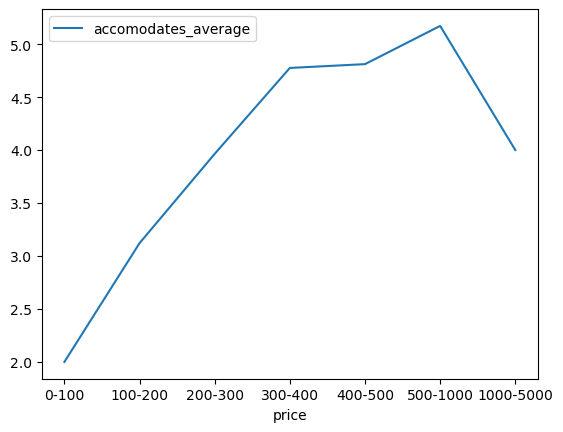

In [17]:
# 4. Graph: draw each graph by the following lists

# 4.1. line plot; x axis = ranged price | y axis = accommodate average
plot_graph_1(data)

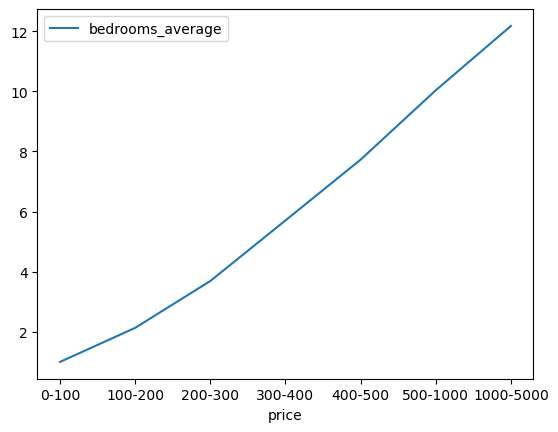

In [18]:
# 4. Graph: draw each graph by the following lists

# 4.2. line plot; x axis = ranged price | y axis = bedrooms average
plot_graph_2(data)

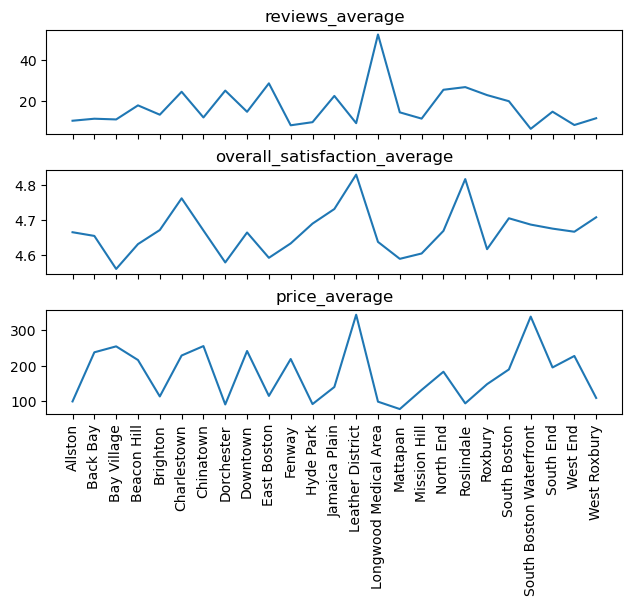

In [19]:
# 4. Graph: draw each graph by the following lists

# 4.3. line subplot x axis = neighborhood 
#      | y axis = reviews average | y axis = overall satisfaction average | y axis = average price average
plot_graph_3(data)